<a href="https://colab.research.google.com/github/siddharthshenoy/Chest-Xray/blob/main/chest_Xray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [7]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

/content/gdrive/My Drive/Kaggle


In [8]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:42<00:00, 44.5MB/s]
100% 2.29G/2.29G [00:42<00:00, 57.3MB/s]


In [10]:
#unzipping thw zip files and deleteing the zip files
!unzip \*.zip && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [11]:
for dirname, _, filenames in os.walk('/content/gdrive/My Drive/Kaggle'):
    for filename in filenames:
        os.path.join(dirname, filename)



Prepare Data

In [23]:
import matplotlib.pyplot as plt 
from PIL import Image
import numpy as np

In [24]:
dir = '/content/gdrive/MyDrive/Kaggle/chest_xray'
test_dir = os.path.join(dir,'test') 
train_dir =os.path.join(dir,'train') 
val_dir =os.path.join(dir,'val') 

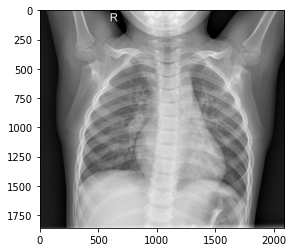

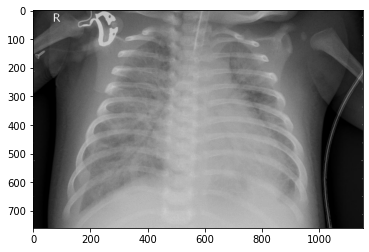

In [26]:
categ = ['NORMAL', 'PNEUMONIA']
for ca in categ:
    path = os.path.join(train_dir,ca)
    for img in os.listdir(path):
        img_arr =Image.open(os.path.join(path,img)) 
        arr = np.array(img_arr)
        plt.imshow(np.array(img_arr),cmap='gray')
        plt.show()
        break

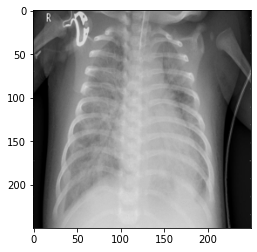

In [27]:
img_size = 250
new_img = img_arr.resize((img_size,img_size))
plt.imshow(new_img,cmap='gray')
plt.show()

(1317, 1857)


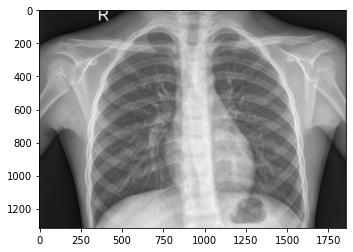

In [28]:
for ca in categ:
    path = os.path.join(test_dir,ca)
    for img in os.listdir(path):
        img_arr =Image.open(os.path.join(path,img)) 
        print(np.array(img_arr).shape)
        plt.imshow(img_arr,cmap='gray')
        plt.show()
        break
    break


Load Data To List

In [30]:
def creat_data(my_list,categ,my_dir):
    img_size = 250
    for ca in categ:
        path = os.path.join(my_dir,ca)
        class_num = categ.index(ca)
        for img in os.listdir(path):
            try:
                img_arr =Image.open(os.path.join(path,img)) 
                new_img = img_arr.resize((img_size,img_size))
                new_img = np.asarray(new_img)
                arr = new_img.reshape((img_size, img_size, 1))
                my_list.append([arr,class_num])
            except Exception as e:
                e = e

In [31]:
train_list = []
test_list = []
val_list = []
creat_data(train_list,categ,train_dir)
print(len(train_list))

4933


In [32]:
creat_data(test_list,categ,test_dir)
print(len(test_list))

624


In [33]:
creat_data(val_list,categ,val_dir)
print(len(val_list))

16


In [34]:
def split_data(X,y,my_list):
    img_size = 250
    for fe,la in my_list:
        X.append(fe)
        y.append(la)
    X = np.array(X).reshape(-1, img_size, img_size, 1)

In [35]:
X_train = []
y_train = []
X_test = []
y_test = []
X_val = []
y_val = []
split_data(X_train, y_train, train_list)

In [36]:
split_data(X_test, y_test, test_list)


In [37]:
split_data(X_val, y_val, val_list)

In [38]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
X_val = np.asarray(X_val)
y_val = np.asarray(y_val)

In [39]:
X_train = X_train/255.0
X_test = X_test/255.0
X_val = X_val/255.0